# Regresión Lineal

# 1. Ejemplo California housing

## 1.1 Importamos librerías

In [1]:
# Cargamos las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

## 1.2 Cargar datos

## Descripción del dataset California Housing

El dataset **California Housing** contiene información de viviendas en California basada en el censo de 1990. Se utiliza comúnmente para tareas de regresión (predicción de precios de casas).

### Variables

- **MedInc**: Ingreso medio de los hogares en la zona (en decenas de miles de dólares).  
- **HouseAge**: Edad media de las casas en la zona (años).  
- **AveRooms**: Número promedio de habitaciones por vivienda.  
- **AveBedrms**: Número promedio de dormitorios por vivienda.  
- **Population**: Población de la zona.  
- **AveOccup**: Promedio de ocupantes por vivienda.  
- **Latitude**: Latitud geográfica de la zona.  
- **Longitude**: Longitud geográfica de la zona.  
- **MedHouseVal**: Valor medio de la vivienda en la zona (en cientos de miles de dólares). Esta es la **variable objetivo**.


In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

#estamos separando los datos que se usan para el entrenamiento y los datos que se usan para test. los separa de forma automatica.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [3]:
#cuantos datos tenemos
X.count()

,0
MedInc,20640
HouseAge,20640
AveRooms,20640
AveBedrms,20640
Population,20640
AveOccup,20640
Latitude,20640
Longitude,20640


In [4]:
X_train.shape

(16512, 8)

In [5]:
y_train.shape

(16512,)

## 1.3 Entrenamos un modelo de regresión lineal

### 1.3.1 Linear Regression

#### Instanciamos el pipeline

In [6]:
#queremos escalar las variables para que despues sean comparables

model = Pipeline([
    ("scaler", StandardScaler()),     # para interpretar coeficientes comparables y facilitar extensión a regularización
    ("lr", LinearRegression())
])

#### Entrenamos

In [ ]:
#aqui queremos que entrene pero no de todos los datos sino de los datos de "train"

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

#### Predecimos y calculamos los residuos

In [8]:

y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

#### Métricas de evaluación

In [11]:
rmse_train = root_mean_squared_error(y_train, model.predict(X_train))
mse_train = mean_squared_error(y_train, model.predict(X_train))
mae_train = mean_absolute_error(y_train, model.predict(X_train))
r2_train = r2_score(y_train, model.predict(X_train))

rmse_test = root_mean_squared_error(y_test, model.predict(X_test))
mse_test = mean_squared_error(y_test, model.predict(X_test))
mae_test = mean_absolute_error(y_test, model.predict(X_test))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Métricas en TRAIN ===")
print(f"MAE : {mae_train:.4f}")
print(f"MSE : {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2  : {r2_train:.4f}")

print("=== Métricas en TEST ===")
print(f"MAE : {mae_test:.4f}")
print(f"MSE : {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2  : {r2_test:.4f}")

#En el r2 si es mas grande es mejor, en las demas es lo contrario. entonces las metricas en train lo hace mejor.
#Si quiero saber si un modelo esta sobreajustando mucho, lo hace demasiado bien en el train entonces no generaliza con los otros datos, y en test no lo hace tan bien.


=== Métricas en TRAIN ===
MAE : 0.5286
MSE : 0.5179
RMSE: 0.7197
R2  : 0.6126
=== Métricas en TEST ===
MAE : 0.5332
MSE : 0.5559
RMSE: 0.7456
R2  : 0.5758


#### Coeficientes e intercepto

In [12]:
coefs = pd.Series(model.named_steps["lr"].coef_, index=X.columns).sort_values(key=np.abs, ascending=False)
print("\n=== Coeficientes (con X escaladas) ===")
print(coefs.round(4))

print("\nIntercepto:", model.named_steps["lr"].intercept_)

#los coeficientes de x, estan relacionados entre sí tambien. ¿se cumplen las hipotesis? ahora viendo esto no lo podemos saber todavia


=== Coeficientes (con X escaladas) ===
Latitude     -0.8969
Longitude    -0.8698
MedInc        0.8544
AveBedrms     0.3393
AveRooms     -0.2944
HouseAge      0.1225
AveOccup     -0.0408
Population   -0.0023
dtype: float64

Intercepto: 2.0719469373788777


#### ¿ Se cumplen los supuestos de los modelos lineales?

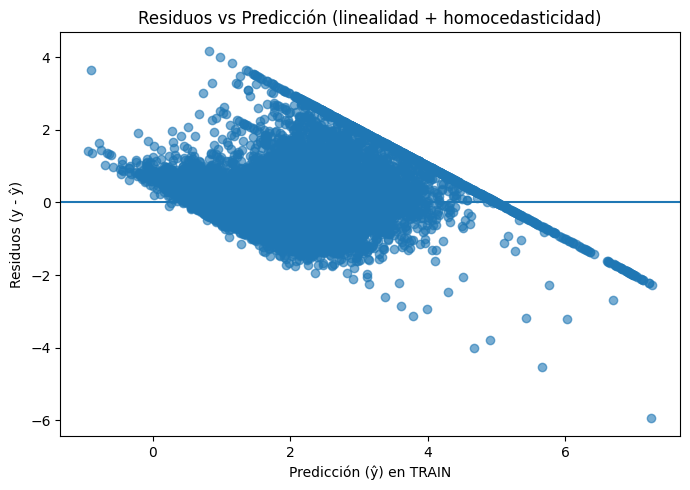

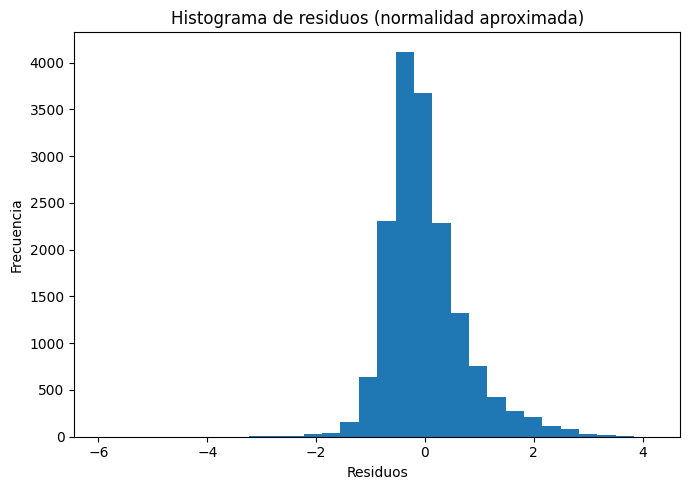

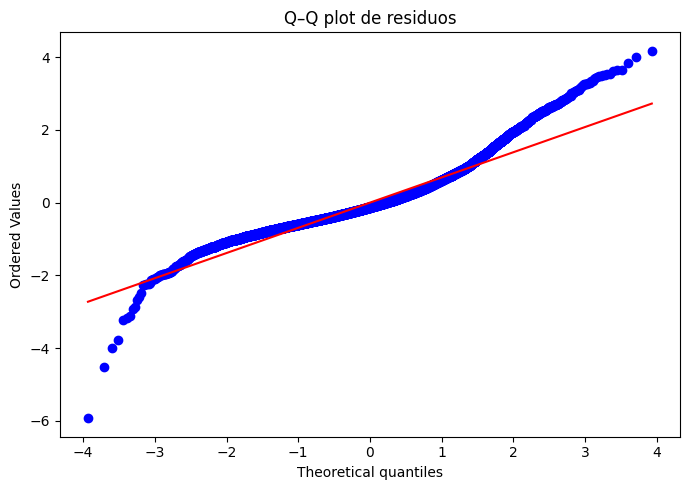

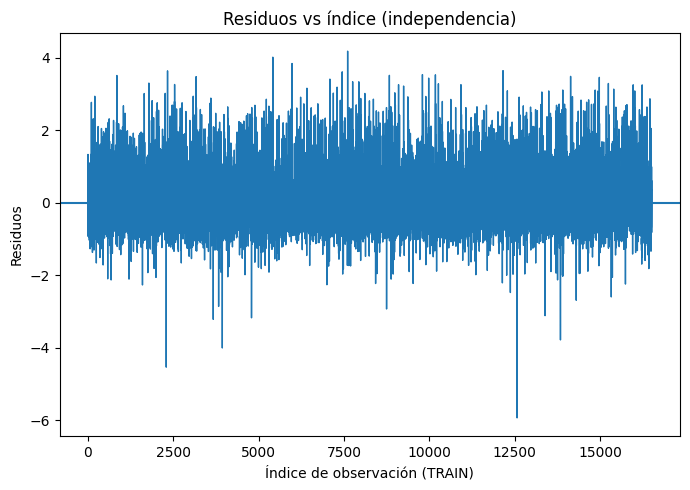

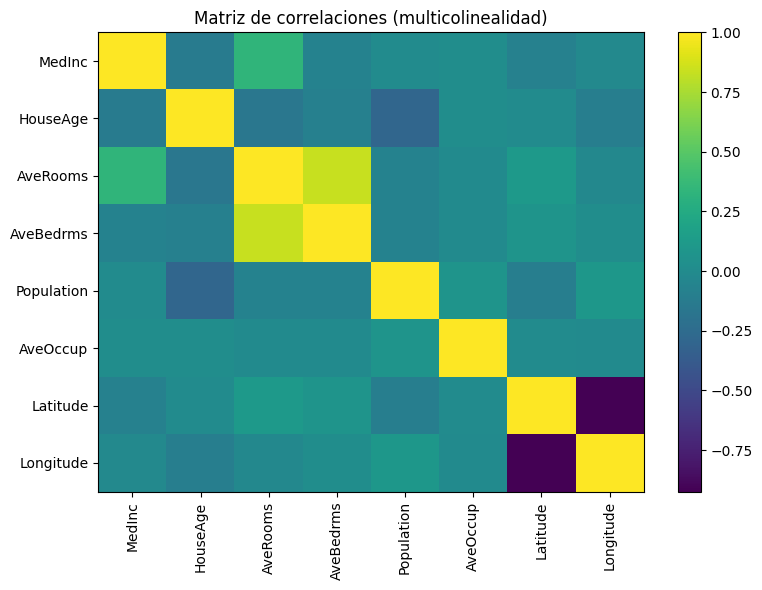

In [13]:
# A) Residuos vs predicción (linealidad + homocedasticidad)
plt.figure(figsize=(7,5))
plt.scatter(y_pred_train, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("Predicción (ŷ) en TRAIN")
plt.ylabel("Residuos (y - ŷ)")
plt.title("Residuos vs Predicción (linealidad + homocedasticidad)")
plt.tight_layout()
plt.show()

#NO CUMPLE LA LINEALIDAD

# B) Histograma de residuos (normalidad aproximada)
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos (normalidad aproximada)")
plt.tight_layout()
plt.show()

#NO CUMPLE LA NORMALIDAD, TENEMOS UNA COLA PESADA DERECHA

# C) Q-Q plot (normalidad)
plt.figure(figsize=(7,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q plot de residuos")
plt.tight_layout()
plt.show()

# D) Residuos vs índice (independencia / rachas)
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(residuals)), residuals, linewidth=1)
plt.axhline(0)
plt.xlabel("Índice de observación (TRAIN)")
plt.ylabel("Residuos")
plt.title("Residuos vs índice (independencia)")
plt.tight_layout()
plt.show()

#SON TOTALMENTE INDEPENDIENTES

# E) Correlaciones (multicolinealidad - vistazo rápido)
corr = X_train.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matriz de correlaciones (multicolinealidad)")
plt.colorbar()
plt.tight_layout()
plt.show()

#AVR DE ROOMS Y AVR DE BEDRROMS ESTAN RELACIONADAS, HAY QUE PENSAR SI QUITAR ALGUNA

¿Se cumplen los supuestos?

Vamos a verlo uno por uno

1. Linealidad + Homocedasticidad -> NO
2. Normalidad de los residuos -> NO
3. Independencia de los residuos -> SI
4. No Multicolinealidad -> NO

Para saber qué está ocurriendo, primero antes de entrenar tendríamos que haber dedicado un tiempo a hacer un EDA

<Axes: xlabel='MedHouseVal', ylabel='Count'>

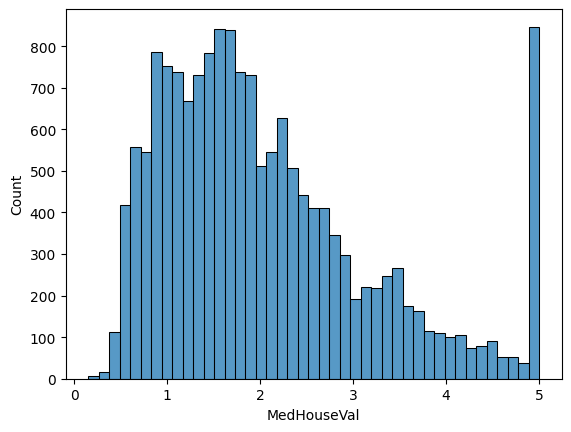

In [15]:
sns.histplot(y_train)
#LO que nos llama la atención es que la casa mas cara es la que mas se repite

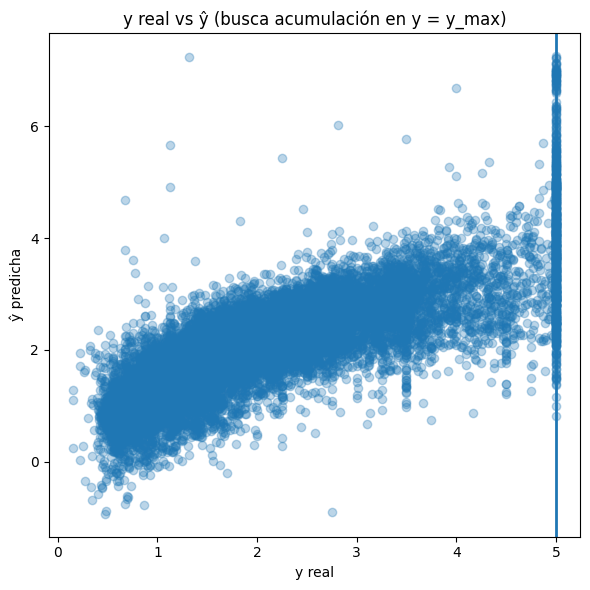

In [16]:
yhat = model.predict(X_train)
plt.figure(figsize=(6,6))
plt.scatter(y_train, yhat, alpha=0.3)
plt.axvline(y_train.max(), linewidth=2)  # si quieres marcar el techo en eje x (y real)
plt.xlabel("y real")
plt.ylabel("ŷ predicha")
plt.title("y real vs ŷ (busca acumulación en y = y_max)")
plt.tight_layout()
plt.show()

#representacion los errores, aquí vemos que estamos poniendo un limite en el 5, entonces hay un problema en el dataset y hace un limite maximo de 5, pudiendo no ser real.
#hay casas que cuestan mas de 5M pero ese es nuestro limite por eso sale asi este grafico, y en el grafico de los residuos sale tan extraño

**OBSERVACIÓN 1**

Se observa que los datos reales están capados en y = 5 (es decir, no tenemos datos reales mayores a 5 aunque debiesen serlo, por eso vemos una acumulación de puntos).

Por eso aparece esa línea descendente: para predicciones grandes, si *y* no puede subir más, el residuo se vuelve cada vez más negativo.

Podríamos eliminar estos puntos para mejorar y evaluar de forma justa el modelo


**OBSERVACIÓN 2**

La distribución del target no es normal, tiene colas pesadas.

A veces introducir transformaciones como log(y) suele mejorarlo. También podemos transformar las features o introducir interacciones entre las variables (como interacciones espaciales).

Podemos usar también modelos que introduzcan no linealidades

**OBSERVACIÓN 3**

Para mejorar el problema de la multicolinealidad podemos utilizar la regularización o eliminar variables correladas

# 2. Ejemplo predicción temperatura

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/Summary%20of%20Weather.csv', index_col=0)
print(df.shape)
df.head()

(119040, 30)


/tmp/ipython-input-3176232658.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/Summary%20of%20Weather.csv', index_col=0)


,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
STA,,,,,,,,,,,,,,,,,,,,,
10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Definimos nuestra variable objetivo y nuestra feature

In [18]:
X = df['MinTemp']
Y = df['MaxTemp']

print("Type and size of the  vector X:", type(X), X.shape)
print("Type and size of the  vector Y:", type(Y), Y.shape)

Type and size of the  vector X: <class 'pandas.core.series.Series'> (119040,)
Type and size of the  vector Y: <class 'pandas.core.series.Series'> (119040,)


#### Representamos X e y

Text(0, 0.5, 'MaxTemp')

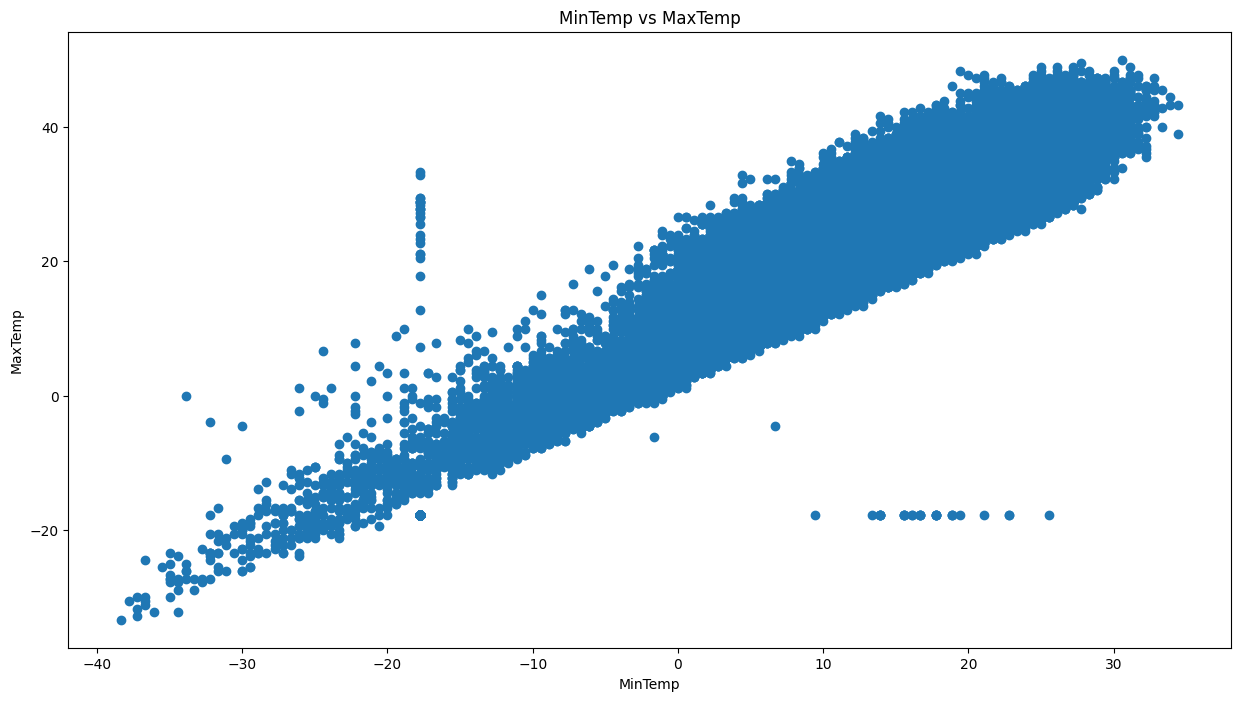

In [19]:
# Scatter plot

width = 15
height = 8
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')

#### Entrenamos usando statsmodels

In [20]:
#es una libreria orientada a estadistica
#ols, ordinary least squares (minimo error)
fit_lm = smf.ols(formula='MaxTemp ~ MinTemp', data=df).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 4.020e+05
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        20:13:31   Log-Likelihood:            -3.3880e+05
No. Observations:              119040   AIC:                         6.776e+05
Df Residuals:                  119038   BIC:                         6.776e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7006      0.028    375.909      0.0

#### Añadimos la temperatura media

In [21]:
fit_lm = smf.ols(formula='MaxTemp ~ MinTemp + MeanTemp ', data=df).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.566e+06
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        20:14:02   Log-Likelihood:            -1.6758e+05
No. Observations:              119040   AIC:                         3.352e+05
Df Residuals:                  119037   BIC:                         3.352e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7596      0.010     77.852      0.0

**¿Tiene sentido el modelo que estamos planteando?¿Por qué?**

In [ ]:
#no tiene sentido porque queremos predecir la maxima temperatura, con la minima pero si quier osaber la max temp de mañana, tengo que usar la minima de mañana.
#y en este momento no tengo los datos de mañana.

In [24]:
#para entrenar usaria la temperatura de los dias anteriores. shift es coger el valor de la fila anterior.
#es la minima temp y la media pero del dia anterior
# Datos de ayer
df['MinTemp_1'] = df['MinTemp'].shift(1)
df['MeanTemp_1'] = df['MeanTemp'].shift(1)

In [25]:
df['MinTemp'].shift(1)

,MinTemp
STA,
10001,NaN
10001,22.222222
10001,21.666667
10001,22.222222
10001,22.222222
...,...
82506,18.888889
82506,18.333333
82506,18.333333


In [26]:
fit_lm = smf.ols(formula='MaxTemp ~ MinTemp_1 + MeanTemp_1', data=df).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 6.923e+05
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        20:18:17   Log-Likelihood:            -2.7572e+05
No. Observations:              119039   AIC:                         5.514e+05
Df Residuals:                  119036   BIC:                         5.515e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9876      0.024     82.132      0.0

**¡Mucho cuidado con las variables que escogemos para entrenar!**
**¡No podemos meter información que no vamos a tener en tiempo de predicción! -> DATA LEAKAGE**